# Train a Smartcab to Drive
## Reinforcement Learning
### by Mohamad Zeini Jahromi

-----

## Getting Started
In this project, we will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, we will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for our analysis.

In [7]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing our driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

In [ ]:
% run smartcab/agent.py

### Observation 1

Running the default `agent.py` agent code, we observed that the Smartcab is idle and does not move at all during the simulation. In addition, the driving agent is receiving positive rewards (around 2 points) for being idle at the red light and receiving negative rewards (around -5 points) for not moving at the green light with no upcoming traffic. The rewards assignments are reasonable since the car supposed to stop when the light is red and supposed to move when it's green with no upcoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included.

### Observation 2

Following are few examples showing different segments and functions of the code;

In the `agent.py` Python file, the following flags can be set and change the simulation runs as follows;
- learning (default value is False): Whether the agent is expected to learn.
- epsilon (default value is 1.0): Random exploration factor
- alpha (default value is 0.5): Learning factor

The "update" method in `agent.py` Python file consists of different steps. In each trial, the current state is recalled or created, the current action is selected, the reward is received based on action and finally, the Q-learning is performed. In the reward step, the "act" method of the Environment class in the `environment.py` Python file is called. This function considers the state of the agent, the location, heading direction, the status of the light and the agent action. It performs the action if it is legal and receives a reward for the agent based on traffic laws. 

In the `simulator.py` Python file, the `render_text()` function is the non-GUI render the display of the simulation where simulated trial data will be rendered in the terminal/command prompt. More over, the `render()` function is the GUI render a display of the simulation.

In the `planner.py` Python file, the `next_waypoint()` function consider the East-West direction first and the North-South direction next.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For first implementation, we navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that we have access to several class variables that will help us write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, we run the agent file and simulation briefly to confirm that our driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, we adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, we may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important to understand what each flag does and how it affects the simulation!

Once we have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), we run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
We run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.

In [ ]:
% run smartcab/agent.py

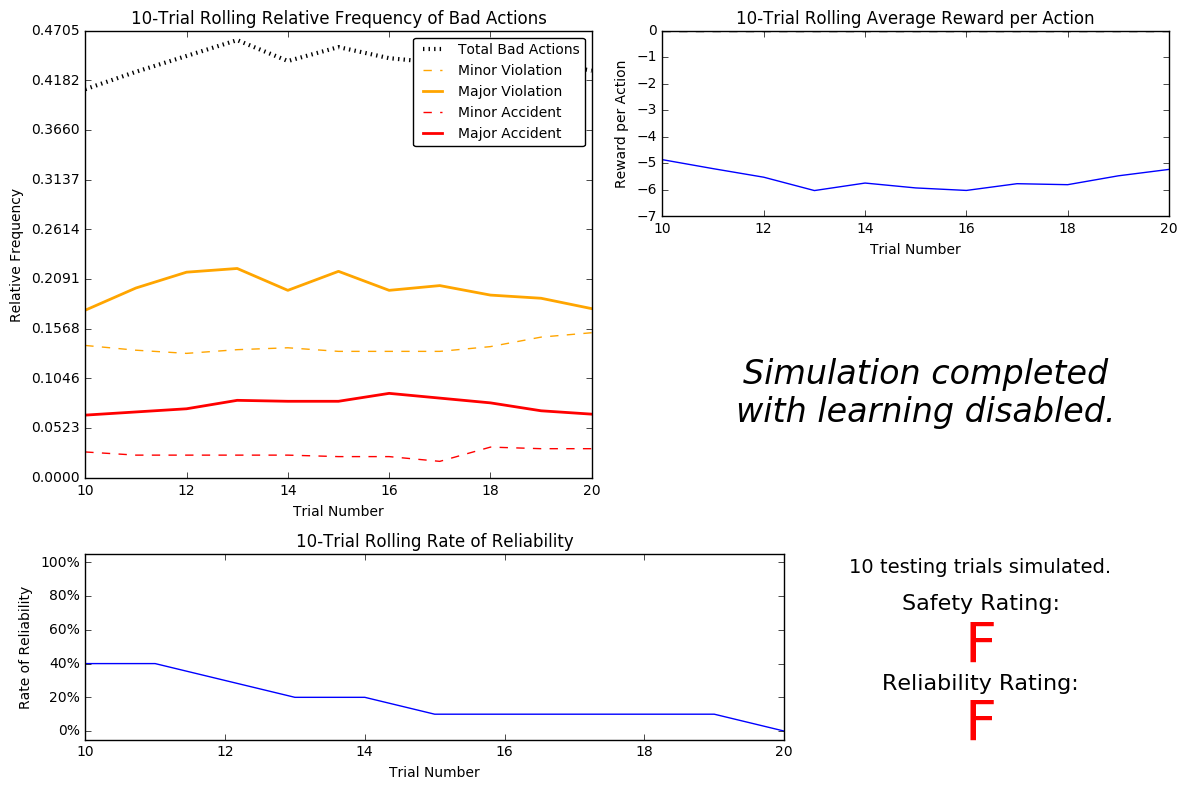

In [11]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Observation 3

Using the visualization above that was produced from our initial simulation, we can make several observations about the driving agent as follows:

- The driving agent is making bad decisions around 45% of the time which 6% of those bad decisions cause major accidents and around 3% of it, cause minor accidents.

- Given that the agent is driving randomly, the rate of reliability approaches to the average rate value as we increase the number of trials. 

- The agent receives positive or negative rewards based on the actions it is taken. The *frequency of bad actions* plot shows around 17% of bad actions are major violations and 6% of it are major accidents which supposedly would lead to large negative rewards and we expect it to be penalized heavily. However, the average rewards per action of around -5 suggests that these large negative rewards are being canceled out with positive rewards and the agent looks like to commits minor traffic violations frequently and has been penalized moderately.

- As the number of trials increases, the *relative frequency of bad actions* and *average rewards per action* are not changing significantly but the *rate of reliability* decrease and approaches to an average value and this is a consequence of the random actions.

- Finally based on very poor *testing results*, we would say this Smartcab can not be considered safe and/or reliable for its passengers. The safety score is F (Agent causes at least one major accident, such as driving through a red light with cross-traffic) and also reliability score is F (Agent fails to reach the destination on time for at least 60% of trips).

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Observation 4

Considering the fact that the "waypoint" and "deadline" features available to the agent are helping the Smartcab to choose the shortest path in the least period of time, we would say these features are most relevant for learning **efficiency**. On the other hand, the "inputs" features (light, left, right and oncoming) prevent the Smartcab from getting into accidents and therefore we would say it is most relevant for learning **safety**. 

All of these features are appropriate for modeling the Smartcab in the environment since they provide the optimum path for each scenario which is the shortest one with minimum violations and no accidents. However, we consider "waypoint" feature to be the most relevant for learning **efficiency** since it essentially chooses the shortest path and complies with the "deadline" feature. In addition, we consider the "light" and "oncoming" features to be the most relevant for learning **safety** since, following the "light" and "oncoming" rules, satisfies the "left" and "right" rules most of the time. As a result, we choose these three features to define the agent's states: **waypoint**, **light** and **oncoming**.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if we expect the driving agent to learn a **policy** for each state, we would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Observation 5

We can calculate the size of the state space by counting the combinations of features. For the "waypoint" feature we have 3 options (left, right and forward) and, for "light" feature we have 2 options (red and green), and for "oncoming" feature we have 4 options (None, left, right and forward). As a result, If a state is defined using these features we've selected from the previous section, the size of the state space is 24 (3x2x4). Given what we know about the environment and how it is simulated, we think the driving agent could learn a policy for each possible state within a reasonable number of training trials. If we have included all features, state space would be more than 3840 (3x2x4x4x4x10) and the driving agent probably couldn't learn all the policies within the training period. 

### Update the Driving Agent State
For your second implementation, we navigate to the `'build_state()'` agent function. With the justification we've provided in **Observation 4**, we now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. We confirm driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, we confirm that the updated state corresponds with what is seen in the simulation.

In [ ]:
% run smartcab/agent.py

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, we will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. 

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that we are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, we will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, we will adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, we use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If case of having difficulty getting our implementation to work, we try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important to understand what each flag does and how it affects the simulation! 

Once we have successfully completed the initial Q-Learning simulation, we run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [ ]:
% run smartcab/agent.py

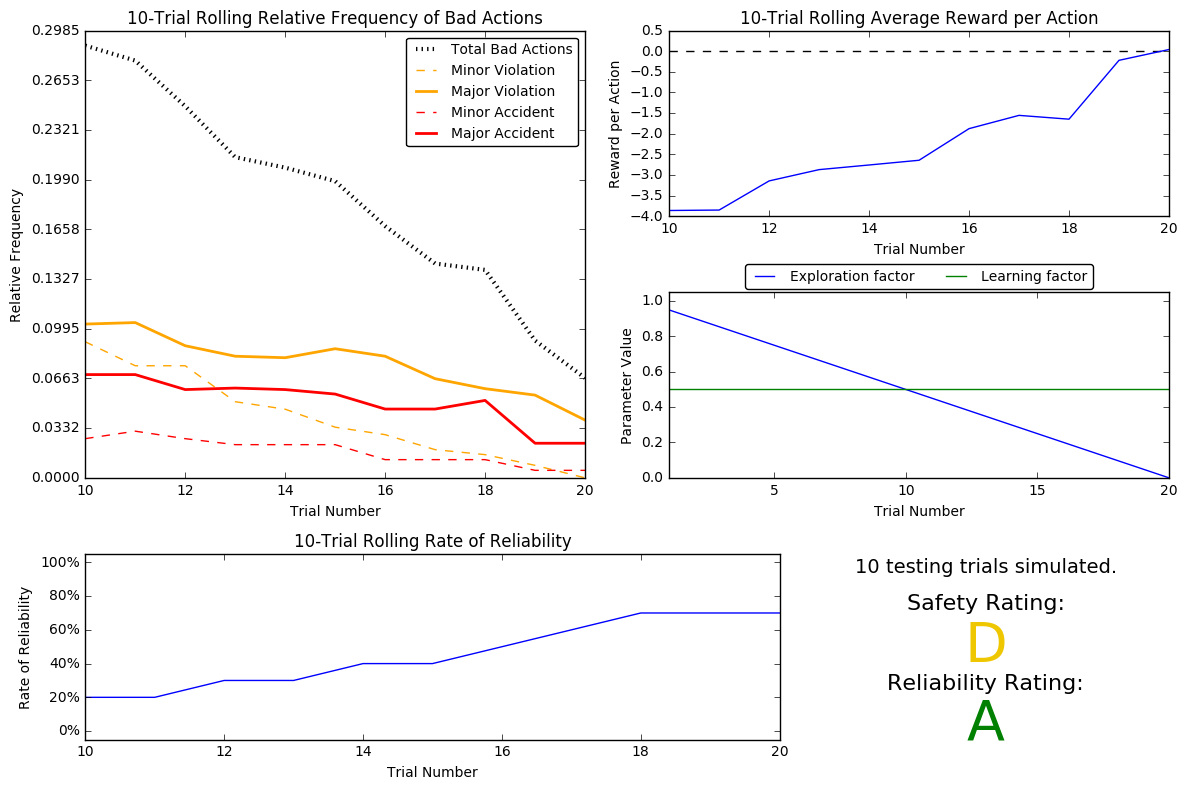

In [436]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Observation 6

Using the visualization above that was produced from your default Q-Learning simulation, we provide an analysis and make observations about the driving agent as before. Note that the simulation also produced the Q-table in a text file which help us make observations about the agent's learning. 

Based on our observations of similarity and differences between the basic driving agent and the default Q-Learning agent, we found out that:

The relative frequency of total bad actions has decreased from 45% to 7% where the number of major accidents and major violations have decreased slightly to around 3% and 5% respectively. We can say, the Q-Learning agent are still likely to get to major accidents but takes relatively less bad actions. The safety rating of D shows the same results too. In addition, the average reward per action plot shows that the agent is now receiving an average of around 0 points per decision and has improved 5 points from the basic driving agent. Finally, the rate of reliability had a major jump to around 70% compared to the 2% of the basic driving agent. The reliability score of A shows the same results.

Based on the epsilon function which is a linear decay of 0.05, and the initial epsilon value of 1, approximately it would take 20 training trials before the epsilon reaches to 0.05. 

The decaying function we implemented for Ïµ  (the exploration factor) accurately represented in the parameters panel. The learning factor line shows the same behavior as stated above.

In short, in the case of default Q-Learning agent, as the number of training trials increases, the number of bad actions decreases and the average reward increases.

The safety and reliability rating compare to the initial driving agent are improved significantly. From initial values of F, the safety rating improved to D and the reliability rating improved to A.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on our Q-Learning implementation, we consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, we will adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, we use a decaying function of our choice for $\epsilon$ (the exploration factor). Note that whichever function we use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials) could be:

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
We may also use a decaying function for $\alpha$ (the learning rate) if we so choose, however this is typically less common. If we do so, we make sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

In case of difficulty getting implementation to work, we try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important to understand what each flag does and how it affects the simulation! 

Once we have successfully completed the improved Q-Learning simulation, we run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [ ]:
% run smartcab/agent.py

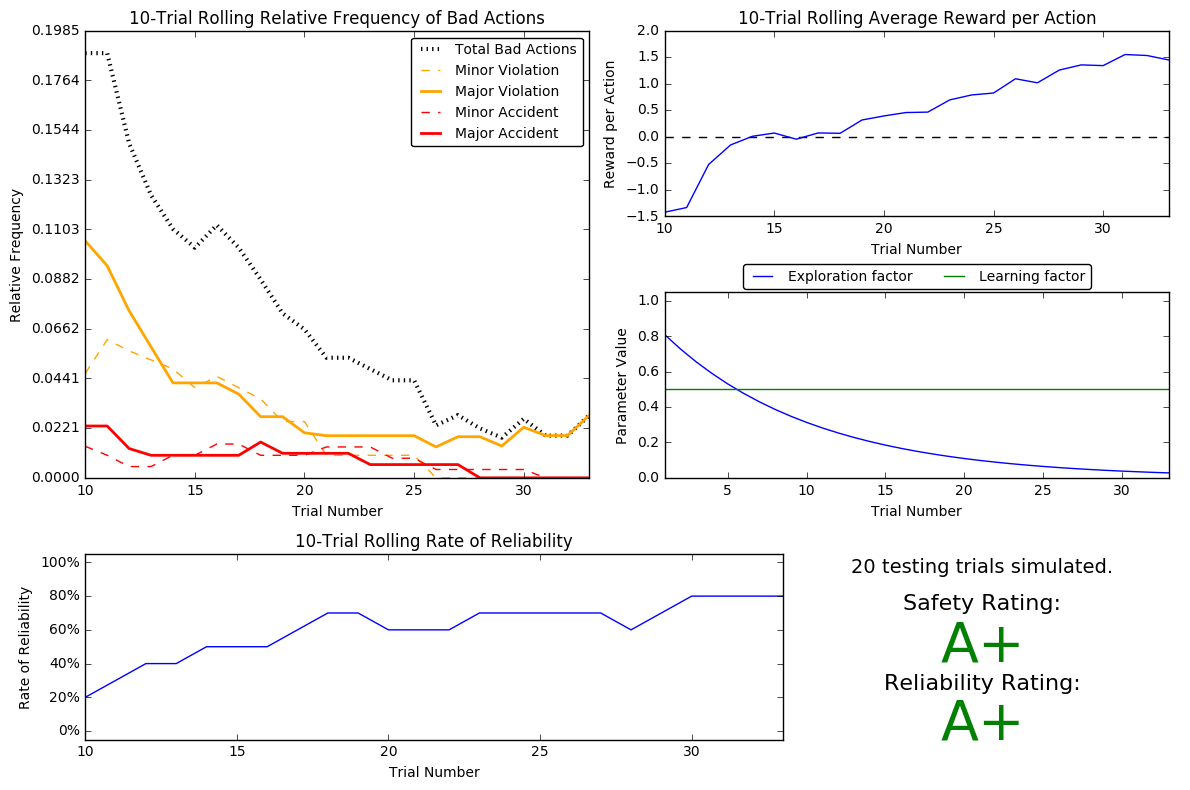

In [29]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Observation 7

Using the visualization above that was produced from our improved Q-Learning simulation, we provide a final analysis and make observations about the improved driving agent like before.  

We tried the following decaying function to use for epsilon (the exploration factor): 
$ \hspace{50px}\epsilon = 0.5^t \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-0.8t}$

and found out the following decaying function to result in the highest safty and reliability ratings. 
$ \hspace{50px}\epsilon = 0.5^t$

Approximately 35 training trials were needed for our agent before beginning testing.

We decreased the epsilon-tolerance gradually and found out that at the value of 0.03 the ratings were improved the most. More over, we tried different alpha values (learning rate) and realized the default value of 0.5 has highest rating results.

Comparing the improved Q-Learner to the default Q-Learner, the relative frequency of total bad actions has decreased further to 4% where the number of major accidents and major violations have decreased to under 1% and 2% respectively. In addition, the average reward per action plot shows that the agent is now receiving an average of around 1 points per decision and has improved from the default Q-Learner. The rate of reliability has improved to around 100% compared to the 70% of the default Q-Learner. 

Therefore, we would say, the Q-Learner results show that our driving agent successfully learned an appropriate policy. 

The safety and reliability ratings compare to the default Q-Learner ratings are improved significantly. We have also increased the testing trials to 20 to make sure our results are more accurate and reliable. The safety rating improved from D to A+ and the reliability rating improved From A to A+ and at this point, we are satisfied with the safety and reliability ratings of the Smartcab.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, we can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, we can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to our advantage for verifying whether the **policy** our driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Observation 8

The optimal policy for the smartcab in the given environment would be the best set of instructions possible given what we know about the environment. Here is the summary of our optimal policy; 

- The driving agent should always stop at red lights and if it passes a red light, it should receive a high negative reward. 
- Since our state space includes only **waypoint**, **light** and **oncoming** features, and we did not include the **left** feature, we can not expect our agent to learn the right turn rule (which is a rule saying a car can turn right at red light if the path is clear and there is no traffic coming from the left side of the car). As a result, we expect our driving agent to be always ideal at the red lights and receive negative rewards even if it turns right correctly.
- At green lights, the driving agent should always move in the direction of "waypoint", unless the oncoming traffic moving in the opposite direction and cause an accident. For these actions that lead to accidents, the agent should receive the highest negative rewards. For example, if the "oncoming" car moves forward, the driving agent can move forward or turn right but not left. If there is no "oncoming" traffic, the driving agent can move in all directions including left.

Next, we investigate the `'sim_improved-learning.txt'` text file to see the results of our improved Q-Learning algorithm. For each state that has been recorded from the simulation, the policy (the action with the highest value) is correct for the majority of given states and there are few states where the policy is different than what would be expected from an optimal policy.


In the following, we provide a few examples from our recorded Q-table which demonstrate that our smartcab learned the optimal policy. The first row shows the `state` dictionary which has a format of **("waypoint", "light", "oncoming")** and the following rows are Q-values assigned to each action.

`('left', 'red', 'forward')
 -- forward : -7.17
 -- right : -0.21
 -- None : 1.76
 -- left : -19.65`

The above policy shows our agent has learned the red light rule very well. 

`('forward', 'green', 'forward')
 -- forward : 1.81
 -- right : 0.54
 -- None : -4.87
 -- left : 0.08`

The above policy shows our agent has learned the green light rule very well. 

`('right', 'red', 'right')
 -- forward : -20.45
 -- right : -9.40
 -- None : 0.23
 -- left : 0.00`

The above policy shows our agent has not recognized the right turn rule which makes sense. 

In the following, we provide an entry where the smartcab did not learn the optimal policy. 

`('left', 'green', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 2.08`

According to the optimal policy, our cab should have avoided turning left since the oncoming traffic move in opposite direction (into the same location). The reason our agents have not learned the correct policy for this state might be having not enough training trials during the exploration with the same situation.

-----
### Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, we did **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Observation 9

There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the Smartcab itself, and the other has to do with the environment. 

The driving agent does not know about the destination location and it only knows what will be the next move which is the "waypoint". This is because, in each time step, the driving agent moves just one cross section and the whole environment (other cars locations) are changing all the time. The priority here is to avoid violations and accidents based on new locations of other cars and after that calculating and updating the shortest distance to the destination. Therefore learning the shortest route to the destination through the whole trial does not make sense and thus taking future rewards does not benefit this project.

On the other hand, in each training trial, the destination is changing and, the route that agent was trained on before and got positive rewards for, will be completely different in next training trial and propagating positive rewards backward from a future state to the current state will not benefit the agent.